In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
# アイリスの計測データ
from sklearn.datasets import load_iris

## データ読み込み

In [2]:
iris = load_iris()
iris_data=iris.data
iris_target=np.array(iris.target,dtype=np.float)

In [3]:
# アイリスの計測データを表形式で表示
df_x=pd.DataFrame(iris_data ,columns=iris.feature_names)
df_y=pd.DataFrame(iris_target ,columns=['target'])
df = pd.concat([df_x, df_y], axis=1)

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## モデルの定義

In [5]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features , h1)
        self.fc2 = nn.Linear(h1 , h2)
        self.fc3 = nn.Linear(h2 , out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## テストデータ

In [6]:
X = iris_data
Y = iris_target
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.20, random_state=123) 

In [7]:
# numpy の値を torch の値に変換する
X_train = torch.FloatTensor(X_train)
Y_train = torch.LongTensor(Y_train)
X_test  = torch.FloatTensor(X_test)
Y_test  = torch.LongTensor(Y_test)

In [8]:
torch.manual_seed(3)
model = Model()
## 出力値が３つなので、CrossEntropyLoss (使う場合は、softmax関数を内部で処理しているため、ニューラルネットワークにsoftmax関数は使用しない)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [9]:
Y_train

tensor([2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1,
        1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0,
        2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1,
        1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1,
        0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2])

In [12]:
epochs=2
loss_list = []

for epoch in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, Y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_list.append(loss)
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1} loss: {loss.item():4f}')

In [13]:
y_pred

tensor([[-6.4346e-01,  2.7515e-02, -1.2827e-01],
        [-4.3102e-01,  8.1600e-02, -1.1745e-01],
        [ 2.4593e-02,  1.4365e-01, -1.3220e-01],
        [ 2.4110e-02,  1.3481e-01, -1.3383e-01],
        [-2.8909e-01,  9.7621e-02, -1.3290e-01],
        [-1.6355e-01,  1.4030e-01, -1.0779e-01],
        [-7.3653e-01,  1.1186e-02, -1.1840e-01],
        [-1.4595e-02,  1.1923e-01, -1.4099e-01],
        [-9.2255e-03,  1.2253e-01, -1.3875e-01],
        [-2.8349e-01,  1.0970e-01, -1.1367e-01],
        [-1.8296e-01,  1.3471e-01, -1.1290e-01],
        [ 4.8823e-02,  1.4295e-01, -1.3050e-01],
        [-6.0484e-01,  5.5542e-02, -9.6218e-02],
        [-4.8636e-01,  7.5302e-02, -9.9801e-02],
        [-4.5106e-01,  9.1622e-02, -9.3323e-02],
        [-4.3774e-01,  6.8463e-02, -1.0951e-01],
        [-5.4946e-01,  4.6955e-02, -1.0658e-01],
        [-2.7461e-01,  1.1574e-01, -1.1094e-01],
        [ 3.0986e-03,  1.2461e-01, -1.4093e-01],
        [ 5.6871e-02,  1.4693e-01, -1.4948e-01],
        [-4.8237e-01

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


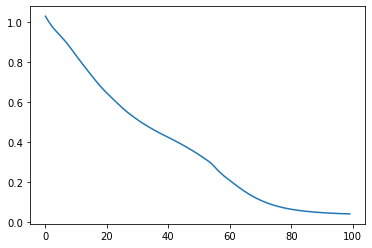

In [32]:
plt.plot(loss_list)

## 検証データを使って検証する

In [35]:
with torch.no_grad():
    predicted_y = model.forward(X_test)
    loss = criterion(predicted_y , Y_test)
    print(loss.item())

0.09750048816204071


# モデルの保存

In [36]:
torch.save(model.state_dict(),'irisModel.pt')

# 未知のデータの予測

In [38]:
# 予測するモードに変更
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)

In [39]:
# 予測に使う入力データ
new_iris = torch.tensor([5.6, 3.7, 2.1, 0.7])

In [40]:
with torch.no_grad():
    # 予測結果（３項目返ってきて、それぞれの確率）
    print(model(new_iris))
    # ０番目が正解
    print(model(new_iris).argmax())

tensor([  5.1438,   0.7898, -10.9314])
tensor(0)


# 保存したモデルの読み込み、予測

In [43]:
new_model = Model()
new_model.load_state_dict(torch.load('irisModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)

In [44]:
with torch.no_grad():
    # 予測結果（３項目返ってきて、それぞれの確率）
    print(new_model(new_iris))
    # ０番目が正解
    print(new_model(new_iris).argmax())

tensor([  5.1438,   0.7898, -10.9314])
tensor(0)
